<a href="https://colab.research.google.com/github/laezylad/FYP/blob/main/Resistance_prediction_usingLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted SoC Values Before Balancing (Percentage):
 [ 34.50081523  17.46054243  42.113343    79.46902864  35.25514307
  99.90144095  13.52545355  53.54970591  22.0802496   30.38055292
  65.89816813  53.35420993  83.68304709  71.80669754  58.00387491
  38.79687237  38.12862757  77.29134281  45.53219245  40.63388415
  60.43322047  36.96211461  76.52484644  27.51844978   9.22816444
  29.51156922  81.56640491  62.74162965  26.85444964  86.23348065
  12.80280654  80.9266111   32.29807998  60.10027813   5.53573345
  85.11468955  86.77577845  37.02892602  91.1395136   87.74379956
  55.04420285  51.74683287  39.67510292  90.49771303  33.55484431
  99.41729286  32.46796405  78.44600221  28.65948737  61.14271247
  78.06519512  89.93233644  74.65912943  91.86217462  80.69640324
  64.90393303  75.93461485  34.18738095  67.92141294  26.74913005
   6.62371726  27.63129443  99.67547884  12.22786567  11.57115482
  76.61778482  29.83231685  26.6477226   31.10125712  50.30337924
  12.67956499  14.90640

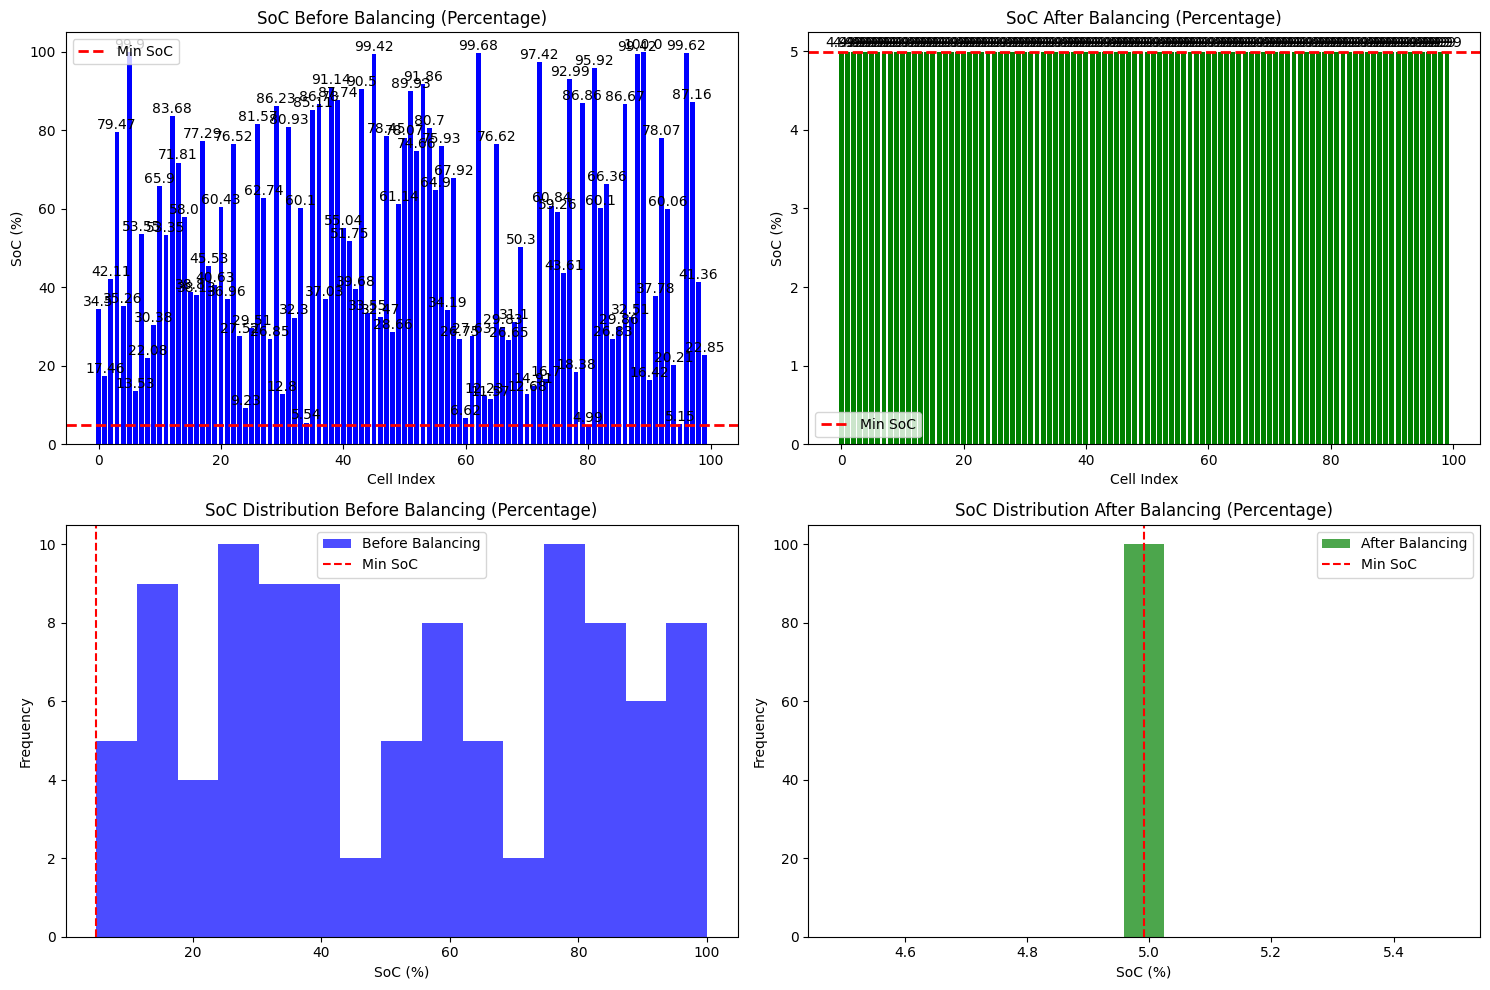

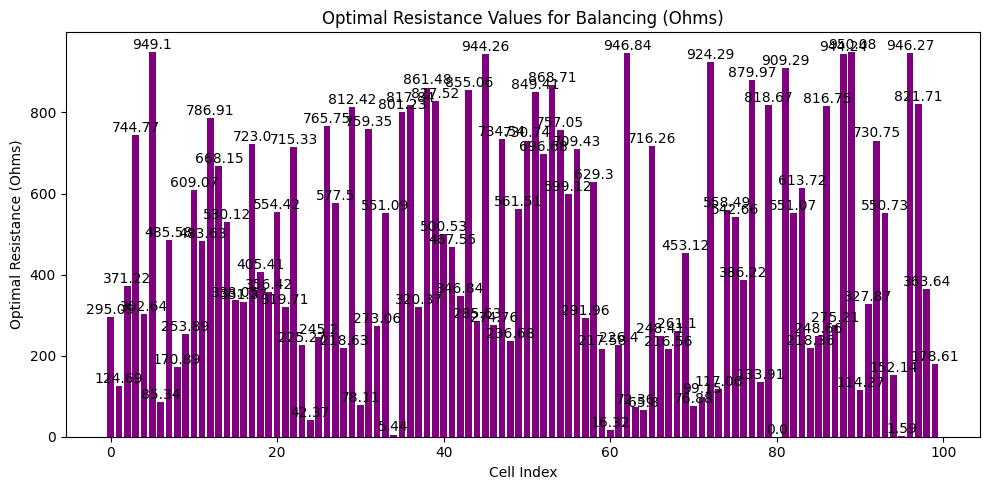

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Example Data for Multiple Battery Cells
def generate_battery_data(num_cells):
    voltage = np.random.uniform(3.5, 4.2, num_cells)  # Voltage in Volts
    current = np.random.uniform(0.1, 5.0, num_cells)  # Current in Amperes
    discharge_capacity = np.random.uniform(0.5, 2.0, num_cells)  # Discharge Capacity in Ah
    charge_energy = np.random.uniform(1.0, 10.0, num_cells)  # Charge Energy in Wh
    discharge_energy = np.random.uniform(1.0, 10.0, num_cells)  # Discharge Energy in Wh

    # Assume Charge Capacity is derived from Voltage and Current
    charge_capacity = (voltage * current) / 10  # Simple derived capacity in Ah

    return np.column_stack((voltage, current, discharge_capacity, charge_energy, discharge_energy, charge_capacity))

# Step 2: Predict State of Charge (SoC) using Linear Regression
def predict_soc(X, W, b):
    return np.dot(X, W) + b

# Step 3: Linear Regression Parameters
def linear_regression(X, y, learning_rate=0.01, iterations=1000):
    num_features = X.shape[1]
    W = np.zeros(num_features)
    b = 0

    for _ in range(iterations):
        y_pred = predict_soc(X, W, b)

        # Calculate error
        error = y_pred - y

        # Calculate gradients
        gradient_W = (1 / len(y)) * np.dot(X.T, error)
        gradient_b = (1 / len(y)) * np.sum(error)

        # Update weights and bias
        W -= learning_rate * gradient_W
        b -= learning_rate * gradient_b

    return W, b

# Step 4: Balance the State of Charge (SoC) to the Minimum SoC
def balance_soc_to_min(soc_values):
    min_soc = np.min(soc_values)
    balanced_soc = np.full_like(soc_values, min_soc)  # Set all values to minimum
    return balanced_soc

# Step 5: Convert SoC values to percentage terms
def convert_to_percentage(soc_values):
    max_soc = np.max(soc_values)
    return (soc_values / max_soc) * 100

# Step 6: Predict Optimal Resistance for Balancing
def predict_optimal_resistance(soc_values, min_soc):
    # Assume a base resistance factor; the actual formula can be adjusted based on your model
    base_resistance = 10  # Base resistance value in Ohms
    optimal_resistance = base_resistance * (soc_values - min_soc)
    optimal_resistance[optimal_resistance < 0] = 0  # No negative resistances
    return optimal_resistance

# Step 7: Visualize SoC Before and After Balancing (in percentage terms)
def visualize_soc(before, after, min_value):
    plt.figure(figsize=(15, 10))

    # Bar chart for SoC before balancing
    plt.subplot(2, 2, 1)
    bars = plt.bar(range(len(before)), before, color='blue')
    plt.axhline(y=min_value, color='red', linestyle='--', label='Min SoC', linewidth=2)
    plt.title('SoC Before Balancing (Percentage)')
    plt.xlabel('Cell Index')
    plt.ylabel('SoC (%)')
    plt.legend()

    # Add labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

    # Bar chart for SoC after balancing
    plt.subplot(2, 2, 2)
    bars_after = plt.bar(range(len(after)), after, color='green')
    plt.axhline(y=min_value, color='red', linestyle='--', label='Min SoC', linewidth=2)
    plt.title('SoC After Balancing (Percentage)')
    plt.xlabel('Cell Index')
    plt.ylabel('SoC (%)')
    plt.legend()

    # Add labels on top of bars
    for bar in bars_after:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

    # Histogram of SoC distribution before balancing
    plt.subplot(2, 2, 3)
    plt.hist(before, bins=15, color='blue', alpha=0.7, label='Before Balancing')
    plt.axvline(x=min_value, color='red', linestyle='--', label='Min SoC')
    plt.title('SoC Distribution Before Balancing (Percentage)')
    plt.xlabel('SoC (%)')
    plt.ylabel('Frequency')
    plt.legend()

    # Histogram of SoC distribution after balancing
    plt.subplot(2, 2, 4)
    plt.hist(after, bins=15, color='green', alpha=0.7, label='After Balancing')
    plt.axvline(x=min_value, color='red', linestyle='--', label='Min SoC')
    plt.title('SoC Distribution After Balancing (Percentage)')
    plt.xlabel('SoC (%)')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Step 8: Visualize Optimal Resistance Values
def visualize_resistance(optimal_resistance):
    plt.figure(figsize=(10, 5))

    # Bar chart for Optimal Resistance values
    plt.bar(range(len(optimal_resistance)), optimal_resistance, color='purple')
    plt.title('Optimal Resistance Values for Balancing (Ohms)')
    plt.xlabel('Cell Index')
    plt.ylabel('Optimal Resistance (Ohms)')

    # Add labels on top of bars
    for i, val in enumerate(optimal_resistance):
        plt.text(i, val + 0.1, round(val, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Main Execution
num_cells = 100  # Number of battery cells
battery_data = generate_battery_data(num_cells)  # Generate battery data
X = battery_data[:, :5]  # Features: Voltage, Current, Discharge Capacity, Charge Energy, Discharge Energy
y = battery_data[:, 5]   # Target: Charge Capacity (SoC)

# Step 9: Train the linear regression model
optimal_weights, optimal_bias = linear_regression(X, y)

# Step 10: Predict the SoC for each cell
predicted_soc = predict_soc(X, optimal_weights, optimal_bias)

# Step 11: Convert predicted SoC values to percentage
predicted_soc_percentage = convert_to_percentage(predicted_soc)

# Step 12: Balance the SoC to the minimum value among the cells (in percentage terms)
balanced_soc_percentage = balance_soc_to_min(predicted_soc_percentage)

# Step 13: Calculate the minimum SoC for visualization
min_soc_percentage = np.min(predicted_soc_percentage)

# Step 14: Predict optimal resistance values for balancing
optimal_resistance = predict_optimal_resistance(predicted_soc_percentage, min_soc_percentage)

# Show predicted SoC values before and after balancing
print("Predicted SoC Values Before Balancing (Percentage):\n", predicted_soc_percentage)
print("\nBalanced SoC Values After Balancing (Set to Min SoC, Percentage):\n", balanced_soc_percentage)
print("\nOptimal Resistance Values for Balancing (Ohms):\n", optimal_resistance)

# Visualize SoC before and after balancing
visualize_soc(predicted_soc_percentage, balanced_soc_percentage, min_soc_percentage)

# Visualize the Optimal Resistance Values
visualize_resistance(optimal_resistance)
